### Sante, Cedrick C.
### BSCpE-3

## SARIMA MODEL


In [ ]:
# Import Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Data Source: Center for Disease Control (CDC) OPEN DATA

In [ ]:
# COVID Data for Philippines (Select Specific Dates Only March 6, 2020 to April 22, 2021)

# Read Data Source (PH-COVID-UPDATED.csv)
covid = pd.read_csv('PH-COVID-UPDATED.csv', parse_dates = True)
covid['Date'] = pd.to_datetime(covid['Date'], format = '%m/%d/%Y')
covid.set_index('Date', inplace = True)
covid.index.freq = 'D' # set frequency to daily

# CODE1: Filter Specific Dates Only

filtered_dates = (covid.index >= '2020-03-06') & (covid.index <= '2021-03-22')
covid = covid.loc[filtered_dates]
covid

,Cases
Date,
2020-03-06,2
2020-03-07,1
2020-03-08,4
2020-03-09,10
2020-03-10,13
...,...
2021-03-18,5286
2021-03-19,7082
2021-03-20,7990


In [ ]:
# COVID Data for Philippines (Select Specific Dates Only March 6, 2020 to April 22, 2021)

# Read Data Source (PH-COVID-UPDATED.csv)
covid = pd.read_csv('PH-COVID-UPDATED.csv', parse_dates = True)
covid['Date'] = pd.to_datetime(covid['Date'], format = '%m/%d/%Y')
covid.set_index('Date', inplace = True)
covid.index.freq = 'D' # set frequency to daily

# CODE1: Filter Specific Dates Only




,Cases
Date,
2020-03-06,2
2020-03-07,1
2020-03-08,4
2020-03-09,10
2020-03-10,13
...,...
2021-03-18,5286
2021-03-19,7082
2021-03-20,7990


### Seasonal ARIMA

In [ ]:
# CODE 2: Import SARIMAX Library from statsmodels

from statsmodels.tsa.statespace.sarimax import SARIMAX

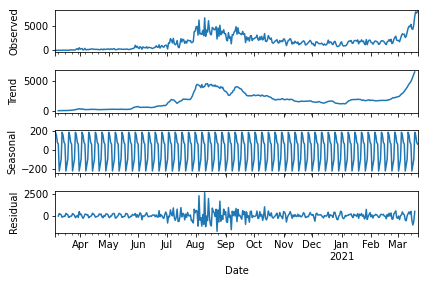

In [ ]:
# CODE 3: Show Time-Series ETS Decomposition, using additive model

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(covid['Cases'], model='additive')
result.plot();

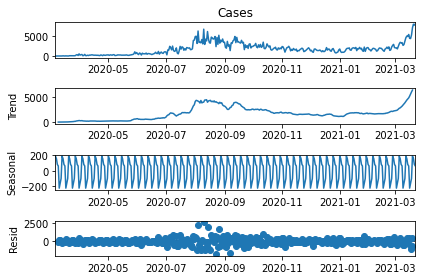

In [ ]:
# CODE 3: Show Time-Series ETS Decomposition, using additive model




In [ ]:
# CODE 4: Train, Test Split (280 Training Size, The rest are testing)

train = covid.iloc[:280]
test = covid.iloc[280:]

In [ ]:
# CODE 5: Show Training data

train

,Cases
Date,
2020-03-06,2
2020-03-07,1
2020-03-08,4
2020-03-09,10
2020-03-10,13
...,...
2020-12-06,1765
2020-12-07,1565
2020-12-08,1386


In [ ]:
# CODE 5: Show Training data



,Cases
Date,
2020-03-06,2
2020-03-07,1
2020-03-08,4
2020-03-09,10
2020-03-10,13
...,...
2020-12-06,1765
2020-12-07,1565
2020-12-08,1386


In [ ]:
# CODE 6: Install PMD ARIMA (You may need to restart if you are using Google Collab)

!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 45.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# CODE 6: Install PMD ARIMA (You may need to restart if you are using Google Collab)



In [ ]:
# Find the best SARIMAX parameters using auto_arima, (with trace = True, seasonal = True, m = 7)
# Need to Import auto_arima

from pmdarima.arima import auto_arima

stepwise_fit = auto_arima(covid, trace = True, seasonal = True, m = 7) # this is already the code

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=5905.702, Time=2.05 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=6057.853, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=5946.129, Time=0.16 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=5944.360, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=6056.216, Time=0.01 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=5924.284, Time=1.08 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=5923.248, Time=1.10 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=5906.731, Time=3.28 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=5907.780, Time=3.15 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=5924.940, Time=0.49 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=5916.238, Time=2.11 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=5914.126, Time=1.77 sec
 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=5908.584, Time=3.63 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=5904.616, Time=1.96 sec
 ARIMA(1,1,2)(0,0,1)[7] intercept

In [ ]:
# Find the best SARIMAX parameters using auto_arima, (with trace = True, seasonal = True, m = 7)
# Need to Import auto_arima

from pmdarima.arima import auto_arima

stepwise_fit = auto_arima(covid, trace = True, seasonal = True, m = 7) # this is already the code

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=5905.702, Time=2.14 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=6057.853, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=5946.129, Time=0.15 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=5944.360, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=6056.216, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=5924.284, Time=1.13 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=5923.248, Time=1.11 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=5906.731, Time=3.27 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=5907.780, Time=3.22 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=5924.940, Time=0.60 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=5916.238, Time=2.18 sec
 ARIMA(2,1,2)(2,0,0)[7] intercept   : AIC=5914.126, Time=1.79 sec
 ARIMA(2,1,2)(2,0,2)[7] intercept   : AIC=5908.584, Time=3.59 sec
 ARIMA(1,1,2)(1,0,1)[7] intercept   : AIC=5904.616, Time=1.91 sec
 ARIMA(1,1,2)(0,0,1)[7] intercept

# Using only Training Data in SARIMAX model fit

In [ ]:
# CODE 7: Model (Fit a model based on the identified best results of the auto_arima)

from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train, order=(2,1,3), seasonal_order=(1,0,1,7))

In [ ]:
# CODE 8: Fit the Model (model.fit)

results = model.fit()

In [ ]:
# CODE 8: Fit the Model (model.fit)



/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
# Results Summary

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Cases   No. Observations:                  280
Model:             SARIMAX(2, 1, 3)x(1, 0, [1], 7)   Log Likelihood               -2165.984
Date:                             Wed, 06 Jul 2022   AIC                           4347.968
Time:                                     09:09:07   BIC                           4377.018
Sample:                                 03-06-2020   HQIC                          4359.622
                                      - 12-10-2020                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3769      0.267     -5.150      0.000      -1.901      -0.853
ar.L2         -0.5312      0.230     -2.306      0.021      -0.983      -0.080
ma.L1          0.6636      0.259      2.559      0.010       0.155       1.172
ma.L2         -0.3048      0.067     -4.568      0.000      -0.436      -0.174
ma.L3         -0.3916      0.119     -3.283      0.001      -0.625      -0.158
ar.S.L7       -0.6769      0.263     -2.575      0.010      -1.192      -0.162
ma.S.L7        0.5918      0.295      2.003      0.045       0.013       1.171
sigma2      3.238e+05    1.7e+04     19.047      0.000     2.9e+05    3.57e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               282.65
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):              15.86   Skew:                             0.57
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Results Summary

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Cases   No. Observations:                  382
Model:             SARIMAX(2, 1, 3)x(1, 0, [1], 7)   Log Likelihood               -2942.247
Date:                             Tue, 15 Jun 2021   AIC                           5900.493
Time:                                     08:22:52   BIC                           5932.036
Sample:                                 03-06-2020   HQIC                          5913.008
                                      - 03-22-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6993      0.049    -34.753      0.000      -1.795      -1.603
ar.L2         -0.8351      0.045    -18.591      0.000      -0.923      -0.747
ma.L1          1.1250      0.051     21.919      0.000       1.024       1.226
ma.L2         -0.0819      0.049     -1.663      0.096      -0.178       0.015
ma.L3         -0.5168      0.033    -15.430      0.000      -0.582      -0.451
ar.S.L7        0.9662      0.050     19.313      0.000       0.868       1.064
ma.S.L7       -0.8651      0.073    -11.846      0.000      -1.008      -0.722
sigma2      2.955e+05   1.19e+04     24.867      0.000    2.72e+05    3.19e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):               468.64
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               2.88   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# CODE 9: Predictions

start = len(train)
end = len(train) + len(test) - 1
predictions = results.predict(start = start, end = end, typ = 'level')

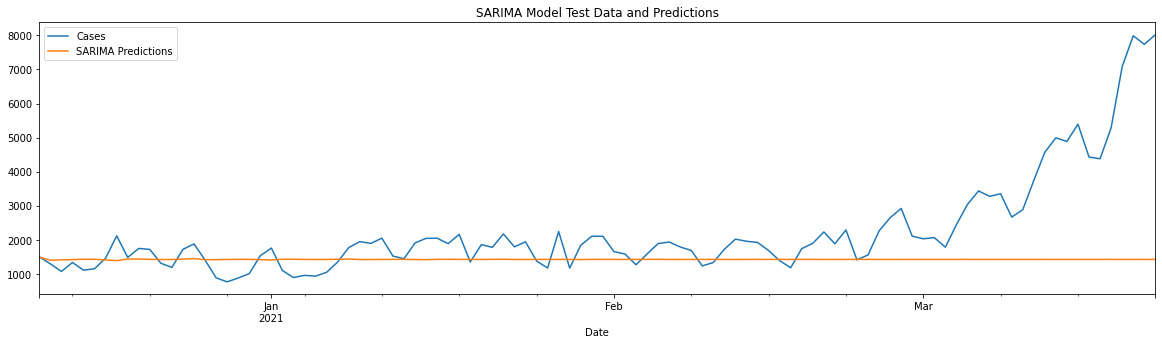

In [ ]:
# CODE 10: Plot the Model Fit

test.plot(legend = True, figsize = (20,5), title = 'SARIMA Model Test Data and Predictions')
predictions.plot(legend = True, label = 'SARIMA Predictions')


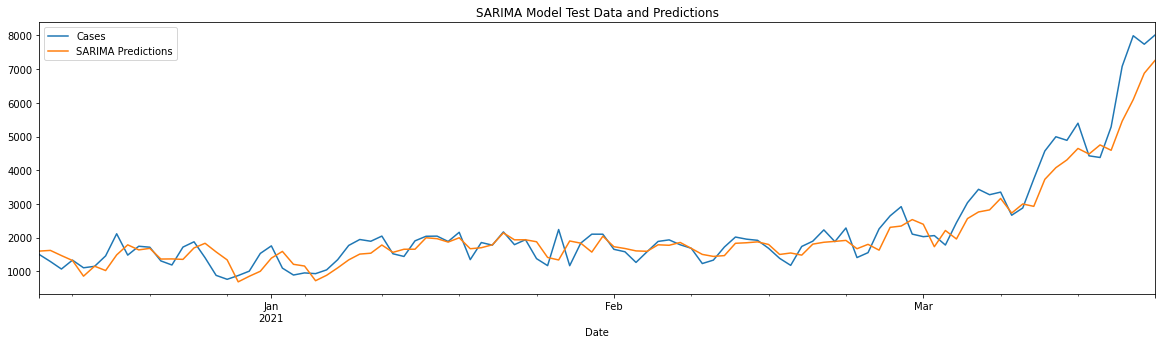

In [ ]:
# CODE 10: Plot the Model Fit



# Using All Data in SARIMAX model fit

In [ ]:
# CODE 7: Model (Fit a model based on the identified best results of the auto_arima)

model = SARIMAX(covid, order=(2,1,3), seasonal_order=(1,0,1,7))

In [ ]:
# CODE 8: Fit the Model (model.fit)

results = model.fit()

In [ ]:
# CODE 8: Fit the Model (model.fit)



/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
# Results Summary

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Cases   No. Observations:                  382
Model:             SARIMAX(2, 1, 3)x(1, 0, [1], 7)   Log Likelihood               -2942.255
Date:                             Wed, 06 Jul 2022   AIC                           5900.510
Time:                                     09:09:53   BIC                           5932.052
Sample:                                 03-06-2020   HQIC                          5913.025
                                      - 03-22-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6984      0.049    -34.669      0.000      -1.794      -1.602
ar.L2         -0.8348      0.045    -18.536      0.000      -0.923      -0.747
ma.L1          1.1245      0.051     21.877      0.000       1.024       1.225
ma.L2         -0.0824      0.049     -1.673      0.094      -0.179       0.014
ma.L3         -0.5175      0.034    -15.445      0.000      -0.583      -0.452
ar.S.L7        0.9663      0.050     19.323      0.000       0.868       1.064
ma.S.L7       -0.8652      0.073    -11.846      0.000      -1.008      -0.722
sigma2      2.956e+05   1.19e+04     24.852      0.000    2.72e+05    3.19e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.32   Jarque-Bera (JB):               469.57
Prob(Q):                              0.57   Prob(JB):                         0.00
Heteroskedasticity (H):               2.88   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Results Summary

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Cases   No. Observations:                  382
Model:             SARIMAX(2, 1, 3)x(1, 0, [1], 7)   Log Likelihood               -2942.247
Date:                             Tue, 15 Jun 2021   AIC                           5900.493
Time:                                     08:22:52   BIC                           5932.036
Sample:                                 03-06-2020   HQIC                          5913.008
                                      - 03-22-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6993      0.049    -34.753      0.000      -1.795      -1.603
ar.L2         -0.8351      0.045    -18.591      0.000      -0.923      -0.747
ma.L1          1.1250      0.051     21.919      0.000       1.024       1.226
ma.L2         -0.0819      0.049     -1.663      0.096      -0.178       0.015
ma.L3         -0.5168      0.033    -15.430      0.000      -0.582      -0.451
ar.S.L7        0.9662      0.050     19.313      0.000       0.868       1.064
ma.S.L7       -0.8651      0.073    -11.846      0.000      -1.008      -0.722
sigma2      2.955e+05   1.19e+04     24.867      0.000    2.72e+05    3.19e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.31   Jarque-Bera (JB):               468.64
Prob(Q):                              0.58   Prob(JB):                         0.00
Heteroskedasticity (H):               2.88   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# CODE 9: Predictions

start = len(train)
end = len(train) + len(test) - 1
predictions = results.predict(start = start, end = end, typ = 'level')

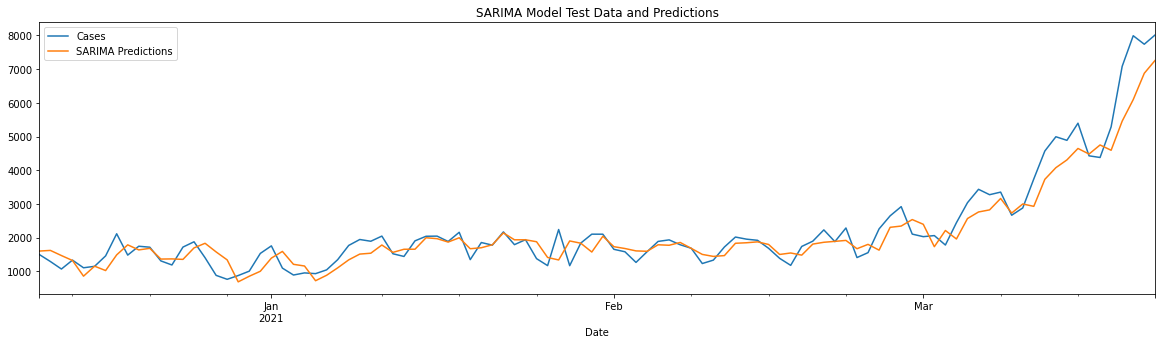

In [ ]:
# CODE 10: Plot the Model Fit

test.plot(legend = True, figsize = (20,5), title = 'SARIMA Model Test Data and Predictions')
predictions.plot(legend = True, label = 'SARIMA Predictions')


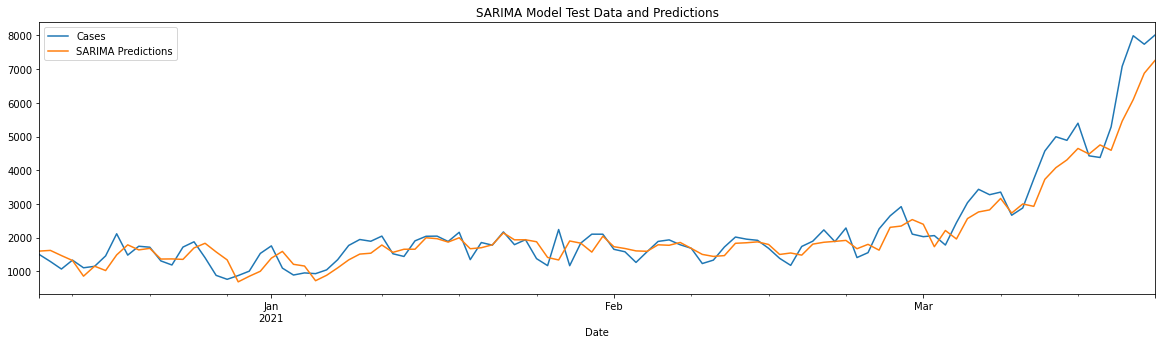

In [ ]:
# CODE 10: Plot the Model Fit



In [ ]:
# CODE 11: Forecast into Unknown Future
# SARIMA Model

model = SARIMAX(covid, order=(2,1,3), seasonal_order=(1,0,1,7))

In [ ]:
# CODE 12: Fit the Model (All Data)

results = model.fit()

In [ ]:
# CODE 12: Fit the Model (All Data)



/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:
# CODE 13: Forecast

start = len(covid)
end = len(covid)+15
predictions = results.predict(start = start, end = end, typ = 'level')
predictions

2021-03-23    7128.350025
2021-03-24    7358.287091
2021-03-25    7430.848535
2021-03-26    8169.927519
2021-03-27    8073.576950
2021-03-28    8152.819225
2021-03-29    8062.040442
2021-03-30    7724.940105
2021-03-31    7800.109541
2021-04-01    8019.787007
2021-04-02    8602.693440
2021-04-03    8607.709425
2021-04-04    8627.223630
2021-04-05    8554.502051
2021-04-06    8250.910863
2021-04-07    8273.395919
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
# CODE 13: Forecast



2021-03-23    7129.254452
2021-03-24    7360.122675
2021-03-25    7431.344781
2021-03-26    8171.251499
2021-03-27    8073.488591
2021-03-28    8154.183150
2021-03-29    8062.058946
2021-03-30    7726.549264
2021-03-31    7800.857156
2021-04-01    8020.691324
2021-04-02    8603.218930
2021-04-03    8607.616527
2021-04-04    8628.155316
2021-04-05    8554.176699
2021-04-06    8252.410244
2021-04-07    8273.566911
Freq: D, Name: SARIMA (1,1,1) (1,0,1,7) FORECAST, dtype: float64

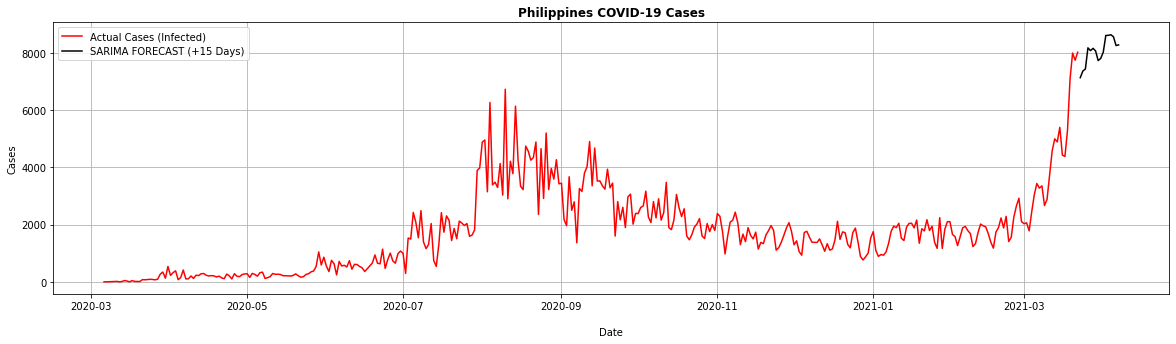

In [ ]:
# CODE 14: Plot SARIMA

plt.figure(figsize = (20,5))
plt.plot(covid['Cases'], color = 'r', label = 'Actual Cases (Infected)')
plt.plot(predictions, color = 'k', label = 'SARIMA FORECAST (+15 Days)')
plt.title('Philippines COVID-19 Cases', fontweight = 'bold')
plt.xlabel('\nDate')
plt.ylabel('Cases')
plt.grid(True)
plt.legend()
plt.show()

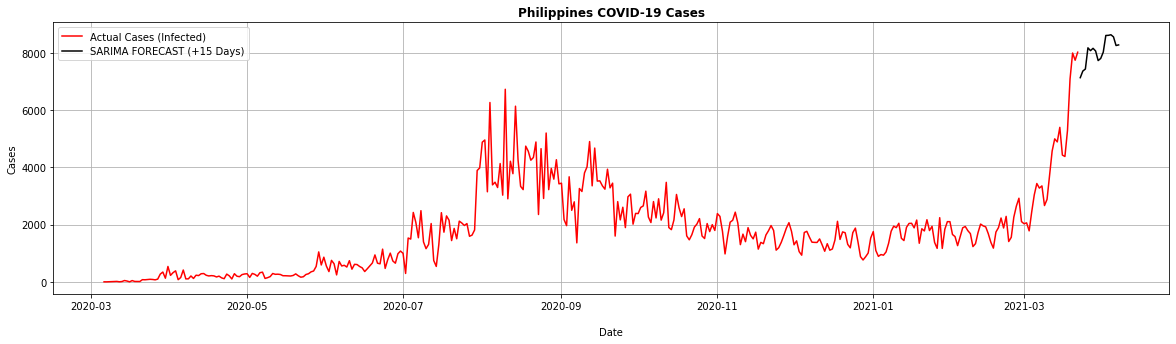

In [ ]:
# CODE 14: Plot SARIMA



In [ ]:
# CODE 15: Evaluation (RMSE), evaluate test_data vs predictions

from statsmodels.tools.eval_measures import rmse
error = rmse(test['Cases'], predictions)
error

452.9734449995181

In [ ]:
# CODE 15: Evaluation (RMSE), evaluate test_data vs predictions



453.00368317086895